<a href="https://colab.research.google.com/github/Siddhant254/Image-Classifier/blob/main/Happy_vs_Sad_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Extracting contents from zipfile containing happy images
import zipfile
zip_file_happy = zipfile.ZipFile('/content/drive/MyDrive/Image Classifier Data/happy.zip')
zip_file_happy.extractall('/content/data/happy')
zip_file_happy.close()

In [2]:
# Extracting contents from zipfile containing sad images
import zipfile
zip_file_happy = zipfile.ZipFile('/content/drive/MyDrive/Image Classifier Data/sad.zip')
zip_file_happy.extractall('/content/data/sad')
zip_file_happy.close()

In [3]:
# Importing Dependencies
import tensorflow as tf
import os

# Remove Dodgy Images

In [4]:
import cv2
import imghdr # Helps in determining the type of image file based on its content

In [5]:
# Create a variable for directory
data_dir = 'data'

In [6]:
# Creating a list of extensions
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
# Removing dodgy images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      os.remove(image_path)

Image not in ext list data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data/sad/vector11.svg
Image not in ext list data/sad/sad-man-pictures-kjxgtb0t0ijlimlj.jpg
Image not in ext list data/sad/vector12.svg
Image not in ext list data/sad/sad-depressed-people-unhappy-young-260nw-1740062456.jpg
Image not in ext list data/sad/vector6.svg
Image not in ext list data/sad/twin-girls-different-moods-260nw-1146949184.jpg
Image not in ext list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data/sad/vector4.svg
Image not in ext list data/sad/vector.svg
Image not in ext list data/sad/vector7.svg
Image not in ext list data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list data/sad/vector3.svg
Image not in ext list data/sad/vector2.svg
Image not in ext list data/sad/vector8.svg
Image not in ext list data/sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image 

In [8]:
# Number of happy images after removing dodgy images
len(os.listdir('data/happy'))

143

In [9]:
# Number of sad images after removing dodgy images
len(os.listdir('data/sad'))

183

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 326 files belonging to 2 classes.


In [12]:
# Making a iterator for our data variable
data_iterator = data.as_numpy_iterator()

In [13]:
# Get another batch from iterator
batch = data_iterator.next()

In [14]:
# labels
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

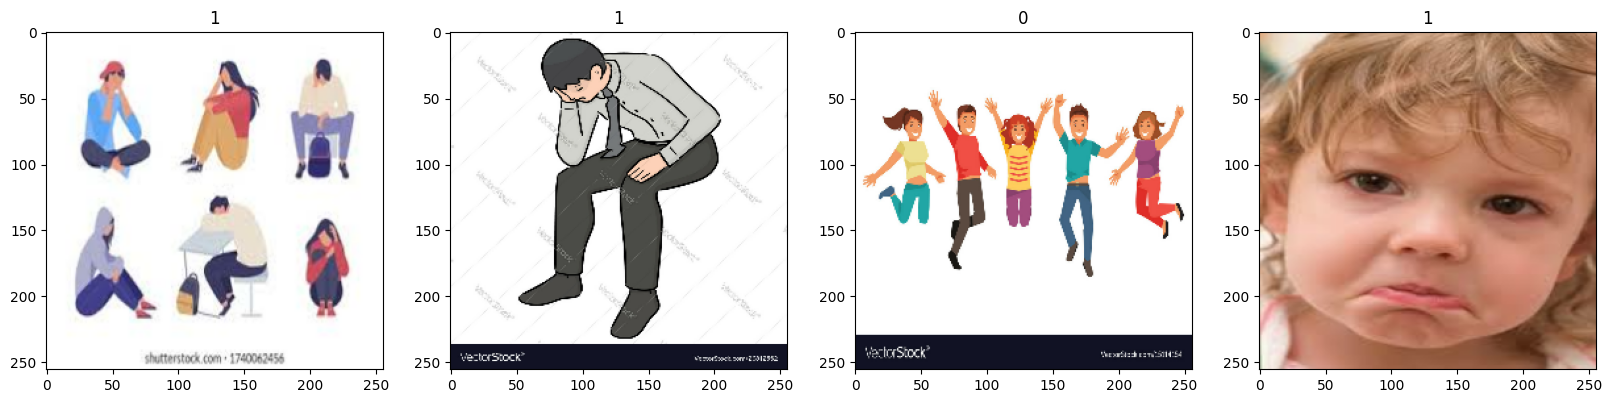

In [15]:
# Configuring the labels using visualization
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Happy = 0
# sad = 1

# PREPROCESS DATA

In [16]:
# scale data
data = data.map(lambda x,y : (x/255 , y)) # Using map to access all the elements in the dataset

In [19]:
scaled_iterator = data.as_numpy_iterator()


In [20]:
batch = scaled_iterator.next()

In [22]:
print("Minimum Pixel Value",batch[0].min())
print("Maximum Pixel Value",batch[0].max())

Minimum Pixel Value 0.0
Maximum Pixel Value 1.0


In [23]:
# SPLIT DATA
train_size = int(len(data)*.7) # 70%
val_size = int(len(data)*.2)+1 # 20%
test_size = int(len(data)*.1)+1 # 10%

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# DEEP LEARNING MODEL

In [34]:
# Import Dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [35]:
# Instantiate Model
model = Sequential()

In [36]:
# Architecture
model.add(Conv2D(16 , (3,3) , 1 , activation='relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32 , (3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16 , (3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

In [37]:
# setting configurations
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy() , metrics=['accuracy'])

In [38]:
# Snapshot of Model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [39]:
# Specify the directory name
directory_name = 'log'

# Create the directory
os.makedirs(directory_name, exist_ok=True)

In [40]:
logdir='log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 476ms/step - loss: 1.3782 - accuracy: 0.5179 - val_loss: 0.7056 - val_accuracy: 0.3958
Epoch 2/20
7/7 [==============================] - 6s 584ms/step - loss: 0.6800 - accuracy: 0.5938 - val_loss: 0.6565 - val_accuracy: 0.6771
Epoch 3/20
7/7 [==============================] - 4s 417ms/step - loss: 0.6114 - accuracy: 0.7545 - val_loss: 0.5828 - val_accuracy: 0.7708
Epoch 4/20
7/7 [==============================] - 4s 418ms/step - loss: 0.4795 - accuracy: 0.8259 - val_loss: 0.3565 - val_accuracy: 0.8958
Epoch 5/20
7/7 [==============================] - 6s 668ms/step - loss: 0.3996 - accuracy: 0.8125 - val_loss: 0.3269 - val_accuracy: 0.8542
Epoch 6/20
7/7 [==============================] - 4s 411ms/step - loss: 0.2823 - accuracy: 0.8839 - val_loss: 0.2024 - val_accuracy: 0.9167
Epoch 7/20
7/7 [==============================] - 5s 507ms/step - loss: 0.2189 - accuracy: 0.9152 - val_loss: 0.1907 - val_accuracy: 0.9271
Epoch 8/20
7/7 [===

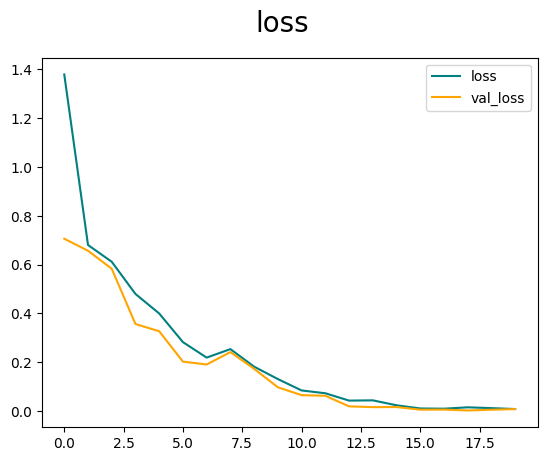

In [43]:
# Visualizing loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend()
plt.show()

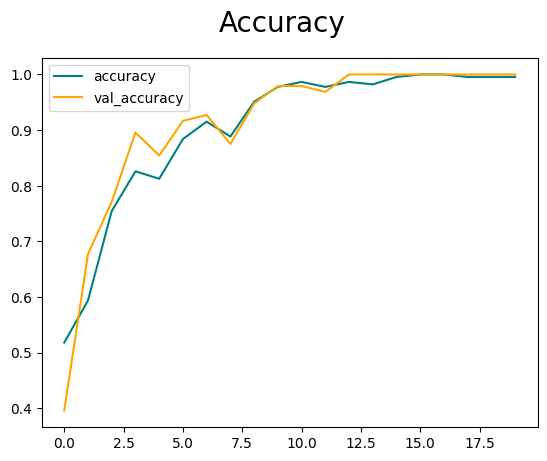

In [44]:
# Visualizing accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

## Evaluate Performance

In [45]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 224ms/step


In [49]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

1.0 1.0 1.0


# TESTING MODEL

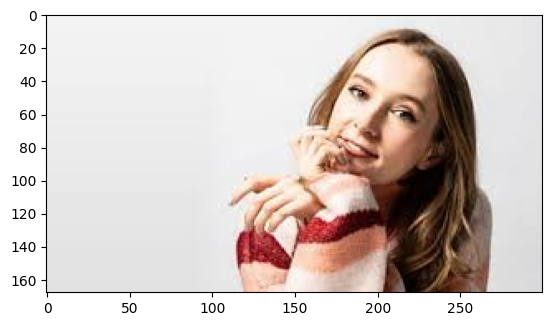

In [51]:
img = cv2.imread('/content/happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

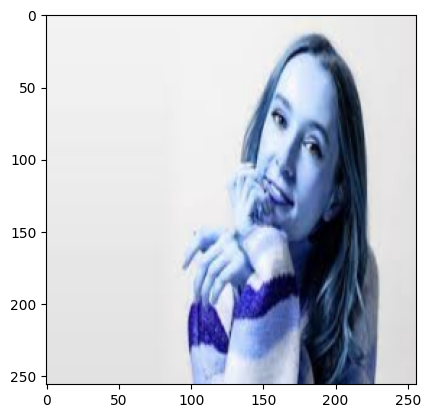

In [58]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
resize.shape

TensorShape([256, 256, 3])

In [61]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 124ms/step


In [62]:
yhat

array([[0.14646196]], dtype=float32)

In [64]:
if yhat > 0.5:
  print(f'Predicted class is SAD')
else:
  print(f'Predicted class is HAPPY')

Predicted class is HAPPY


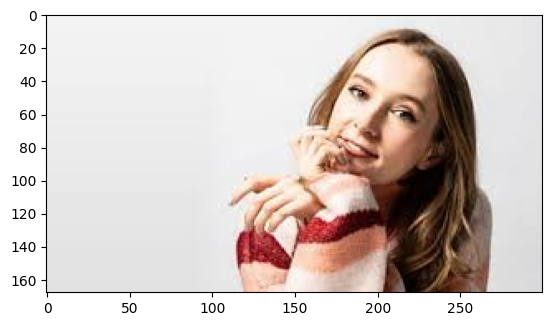

1/1 [==============================] - 0s 18ms/step
Predicted class is HAPPY


In [65]:
# Happy Person
img = cv2.imread('/content/happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
resize = tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
  print(f'Predicted class is SAD')
else:
  print(f'Predicted class is HAPPY')

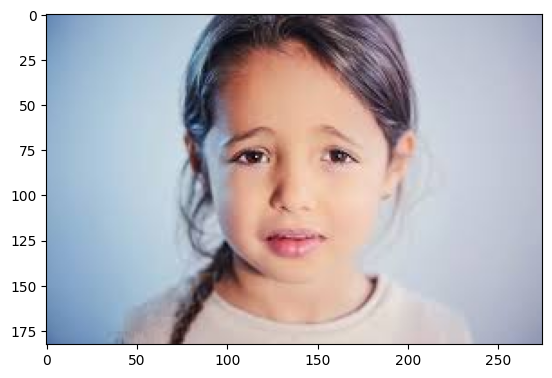

1/1 [==============================] - 0s 18ms/step
yhat : [[0.96434706]]
Predicted class is SAD


In [69]:
# SAD PERSON
img_sad = cv2.imread('/content/sadtest3.jpg')
plt.imshow(cv2.cvtColor(img_sad,cv2.COLOR_BGR2RGB))
plt.show()
resize_sad = tf.image.resize(img_sad,(256,256))
yhat = model.predict(np.expand_dims(resize_sad/255,0))
print('yhat :',yhat)
if yhat > 0.5:
  print(f'Predicted class is SAD')
else:
  print(f'Predicted class is HAPPY')